<a href="https://colab.research.google.com/github/awjallow/CSC_447_ML_Notebooks/blob/main/Amadou_Jallow_AS03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [149]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class label']
display(df.head())

,Sepal length,Sepal width,Petal length,Petal width,Class label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [138]:
# IA = df.iloc[:,:].values
# Cl = IA[:,4]
# IC = np.unique(IA[:,4])

# print(IC)

# Data Splitting

In [150]:
X = df[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']].values
y = pd.factorize(df['Class label'])[0]
# display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# display(X_train)

print('Training data points: {}'.format(X_train.shape[0]))
print('Testing data points: {}'.format(X_test.shape[0]))
print('Class labels: {} (mapped from {}'.format(np.unique(y), np.unique(df['Class label'])))

Training data points: 100
Testing data points: 50
Class labels: [0 1 2] (mapped from ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [140]:
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

# Adaline

In [125]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        The seed of the pseudo random number generator.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values or labels.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.activation(X)
            
            # Cost function
            error = (y - output)
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
            
            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

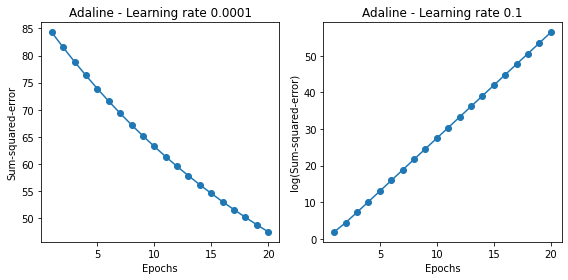

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=20, eta=0.0001).fit(X_train_std, y_train)
ax[0].plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline - Learning rate 0.0001')

ada2 = AdalineGD(n_iter=20, eta=0.1).fit(X_train_std, y_train)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.1')

plt.tight_layout()
plt.show()

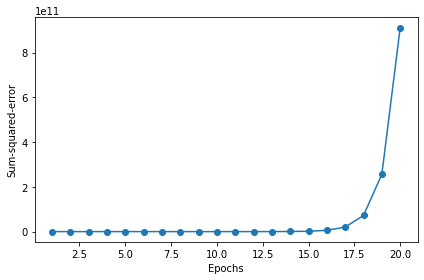

Accuracy: 0.06


In [127]:
ada = AdalineGD(n_iter=20, eta=0.01)
ada.fit(X_train_std, y_train)

# cost values

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

# testing accuracy

y_pred = ada.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# Logistic Regression

In [151]:
logReg = LogisticRegression()
logReg.fit(X, y)
logRegScore = logReg.score(X, y)

print("Logistic Regression Score:", logRegScore)

Logistic Regression Score: 0.9733333333333334


# SVM Linear

In [152]:
svmLinear = SVC(kernel="linear")
svmLinear.fit(X, y)
svmLinearScore = svmLinear.score(X, y)

print("SVM Linear Score:", svmLinearScore)

SVM Linear Score: 0.9933333333333333


# SVM Polynomial

In [153]:
svmPoly = SVC(kernel="poly")
svmPoly.fit(X, y)
svmPolyScore = svmPoly.score(X, y)

print("SVM Polynomial Score:", svmPolyScore)

SVM Polynomial Score: 0.9733333333333334


# SVM RBF

In [154]:
svmRbf = SVC(kernel="rbf")
svmRbf.fit(X, y)
svmRbfScore = svmRbf.score(X, y)

print("SVM RBF Score:", svmRbfScore)

SVM RBF Score: 0.9733333333333334


# Decision Trees

In [155]:
dTree = DecisionTreeClassifier()
dTree.fit(X ,y)
dTreeScore = dTree.score(X, y)

print("Decision Trees Score:", dTreeScore)

Decision Trees Score: 1.0


# Ada Boost

In [156]:
baseEstimator = DecisionTreeClassifier()
adaBoost = AdaBoostClassifier(baseEstimator)
adaBoost.fit(X, y)
adaBoostScore = adaBoost.score(X, y)

print("Ada Boost Score:", adaBoostScore)

Ada Boost Score: 1.0


# Random Forest

In [148]:
rForest = RandomForestClassifier()
rForest.fit(X, y)
rForestScore = rForest.score(X, y)

print("Random Forest Score:", rForestScore)

Random Forest Score: 1.0


# Logistic Regression

In [158]:
logRegSplit = LogisticRegression()
logRegSplit.fit(X_train, y_train)
logRegSplitTrainScore = logRegSplit.score(X_train, y_train)
logRegSplitTestScore = logRegSplit.score(X_test, y_test)